## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("/Users/Chaha/Downloads/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [107]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trtbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalachh:			 maximum heart rate achieved
exng:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slp:			the slope of the peak exercise ST segment
caa:			number of major vessels (0-3) colored by flourosopy
thall:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [10]:
dataset["output"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [11]:
dataset["output"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [12]:
print(dataset.corr()["output"].abs().sort_values(ascending=False))

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: output, dtype: int64


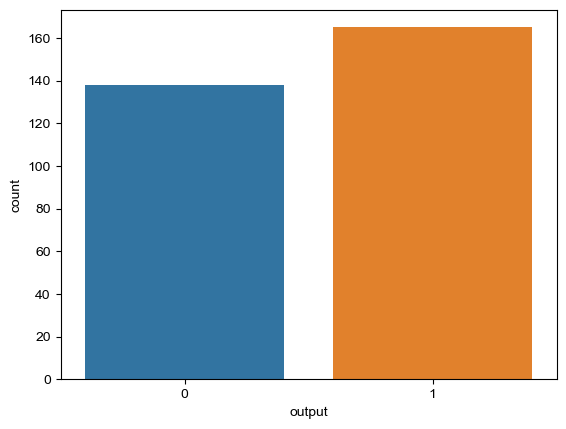

In [13]:
y = dataset["output"]

sns.countplot(x=y)
sns.set(rc={'figure.figsize':(11,10)})


output_temp = dataset.output.value_counts()

print(output_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(output_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(output_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa' and 'thall' features

### Analysing the 'Sex' feature

In [15]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='output'>

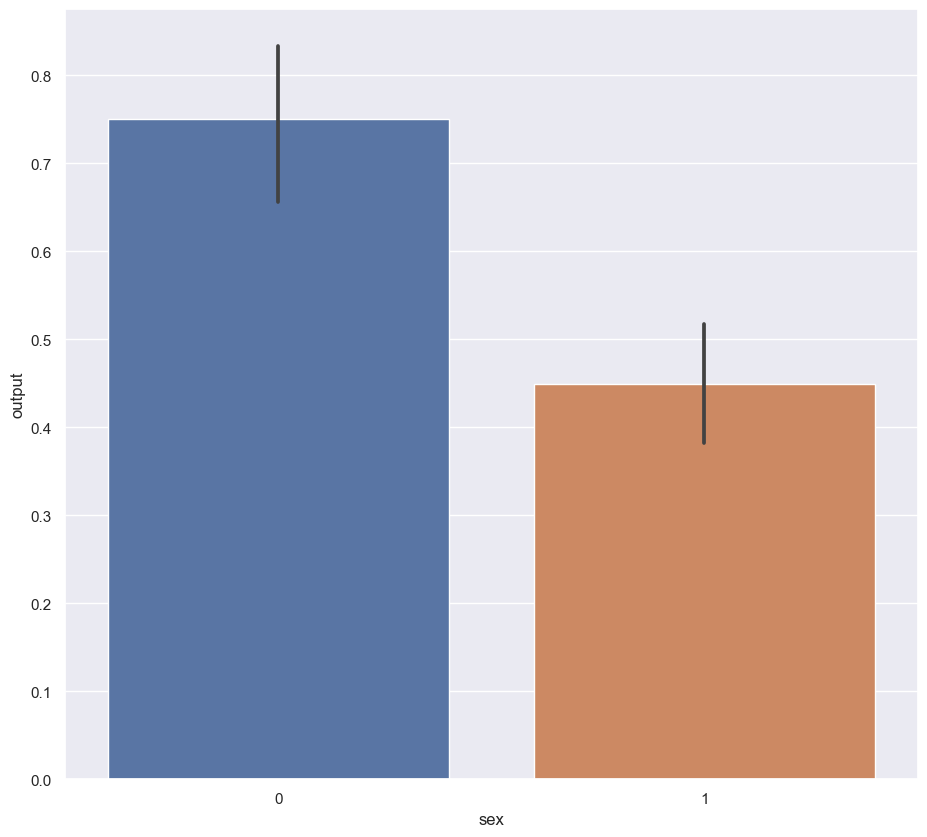

In [16]:
sns.barplot(x=dataset["sex"], y=dataset["output"])

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [17]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='output'>

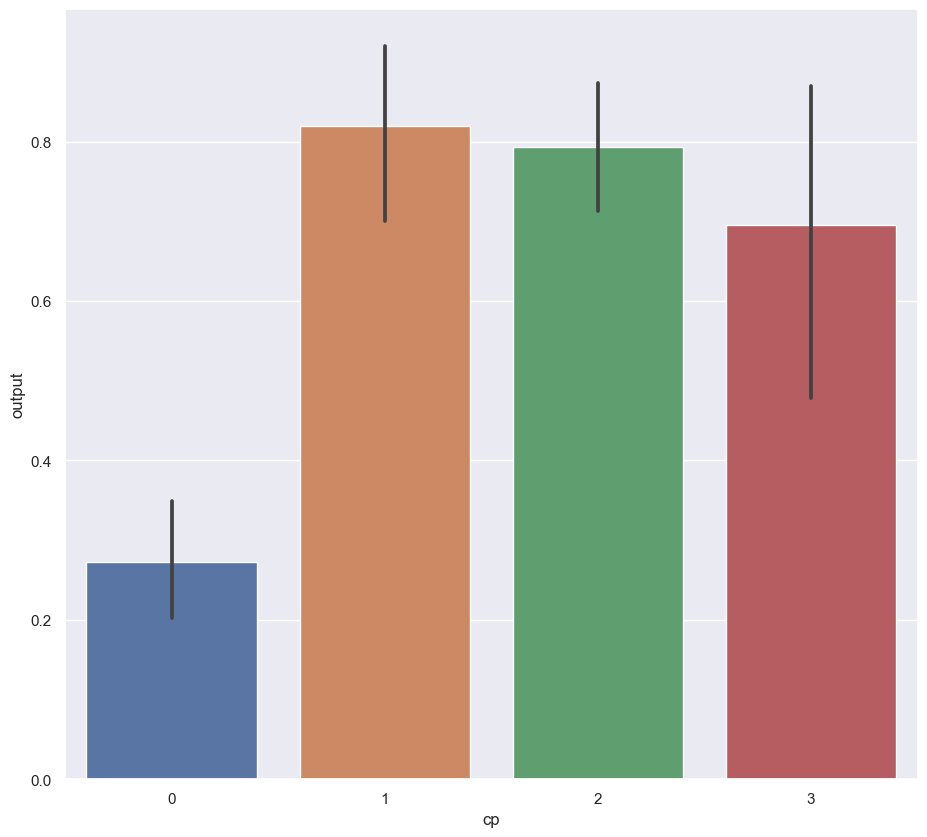

In [18]:
sns.barplot(x=dataset["cp"], y=dataset["output"])

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='output'>

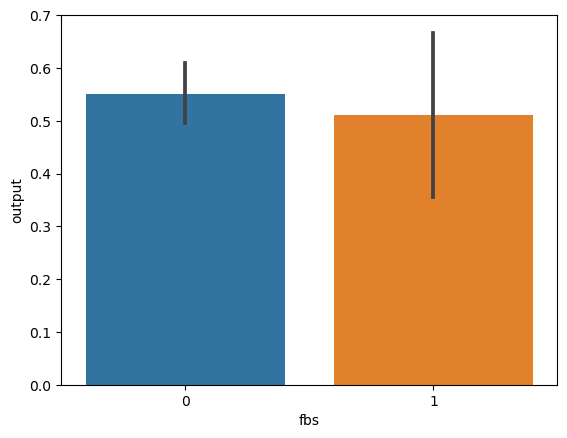

In [23]:
sns.barplot(x=dataset["fbs"], y=dataset["output"])

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='output'>

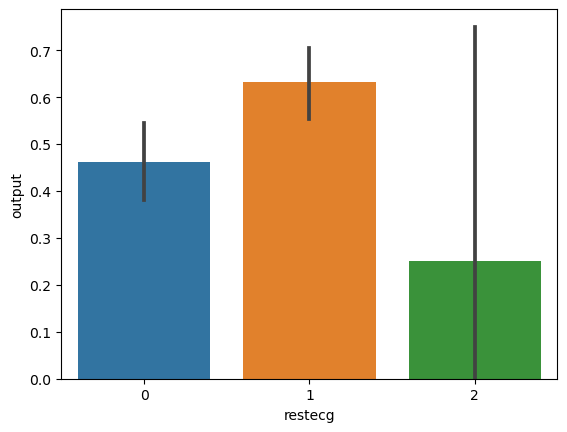

In [25]:
sns.barplot(x=dataset["restecg"], y=dataset["output"])

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exng' feature

In [26]:
dataset["exng"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exng', ylabel='output'>

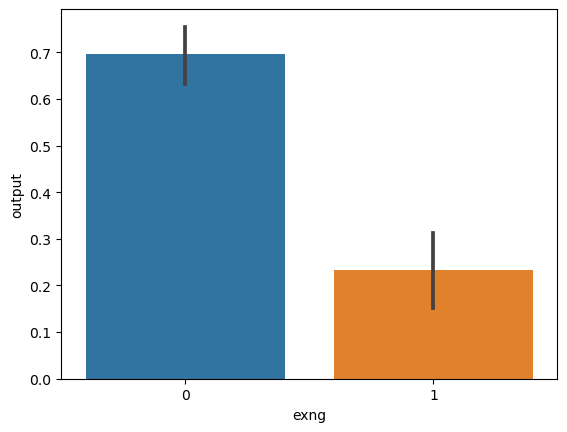

In [27]:
sns.barplot(x=dataset["exng"],y=dataset["output"])

##### People with exng=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slp"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slp', ylabel='output'>

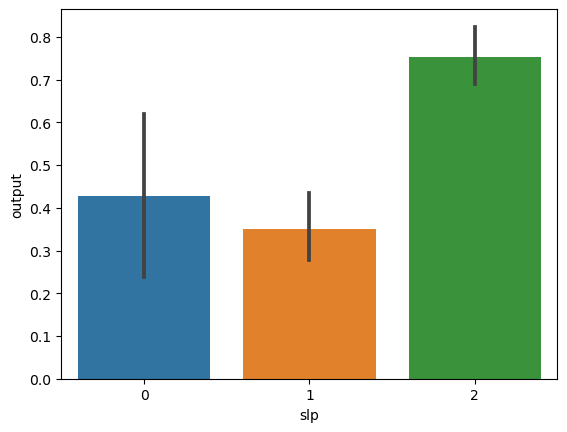

In [29]:
sns.barplot(x=dataset["slp"], y=dataset["output"])

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'caa' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["caa"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='caa', ylabel='count'>

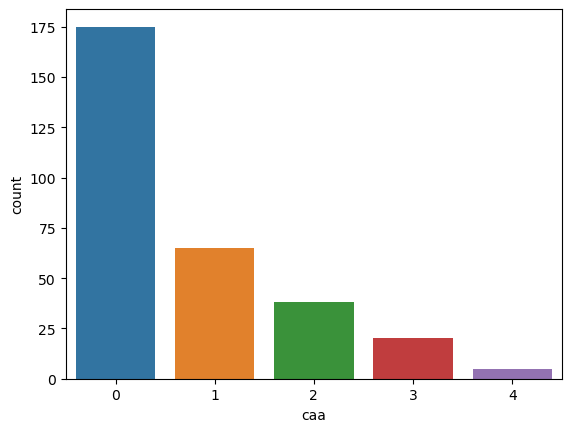

In [32]:
sns.countplot(x=dataset["caa"])

<Axes: xlabel='caa', ylabel='output'>

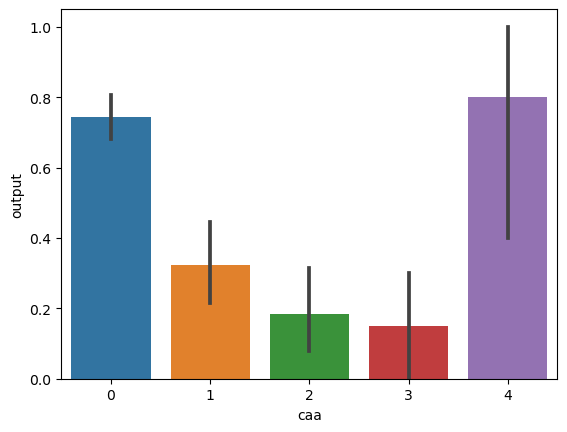

In [33]:
sns.barplot(x=dataset["caa"], y=dataset["output"])

##### caa=4 has astonishingly large number of heart patients

In [34]:
### Analysing the 'thall' feature

In [35]:
dataset["thall"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thall', ylabel='output'>

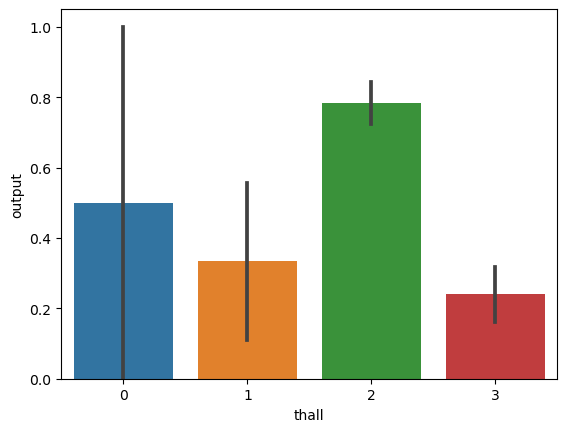

In [36]:
sns.barplot(x=dataset["thall"], y=dataset["output"])

C:\Users\Chaha\AppData\Local\Temp\ipykernel_14624\1171286722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["thall"])


<Axes: xlabel='thall', ylabel='Density'>

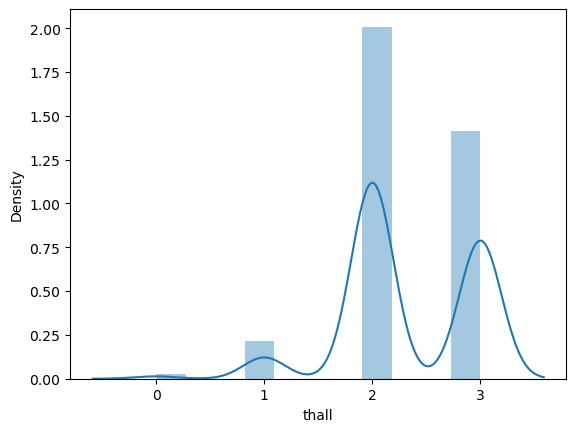

In [37]:
sns.distplot(dataset["thall"])

## IV. Train Test split

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("output",axis=1)
target = dataset["output"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [39]:
X_train.shape

(242, 13)

In [40]:
X_test.shape

(61, 13)

In [41]:
Y_train.shape

(242,)

In [42]:
Y_test.shape

(61,)

## V. Model Fitting

In [43]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\Chaha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
Y_pred_lr.shape

(61,)

In [46]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(61,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [50]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [51]:
Y_pred_svm.shape

(61,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [54]:
Y_pred_knn.shape

(61,)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
print(Y_pred_dt.shape)

(61,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [60]:
Y_pred_rf.shape

(61,)

In [61]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


### XGBoost

In [62]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [63]:
Y_pred_xgb.shape

(61,)

In [64]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


### Neural Network

In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
plt.figure(figsize=(20, 10))
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8471
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8430
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8471
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8512
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8430
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8430
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8306
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8264
Epoch 9/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8347
Epoch 10/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8471
Epoch 11/300
8/8 [===========

<Figure size 2000x1000 with 0 Axes>

In [68]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [69]:
Y_pred_nn.shape

(61, 1)

In [70]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [71]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 81.97 %


## VI. Output final score

In [72]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors",
              "Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 81.97 %


<Axes: title={'center': 'Algorithm Accuracy Comparison'}, xlabel='Algorithms', ylabel='Accuracy score'>

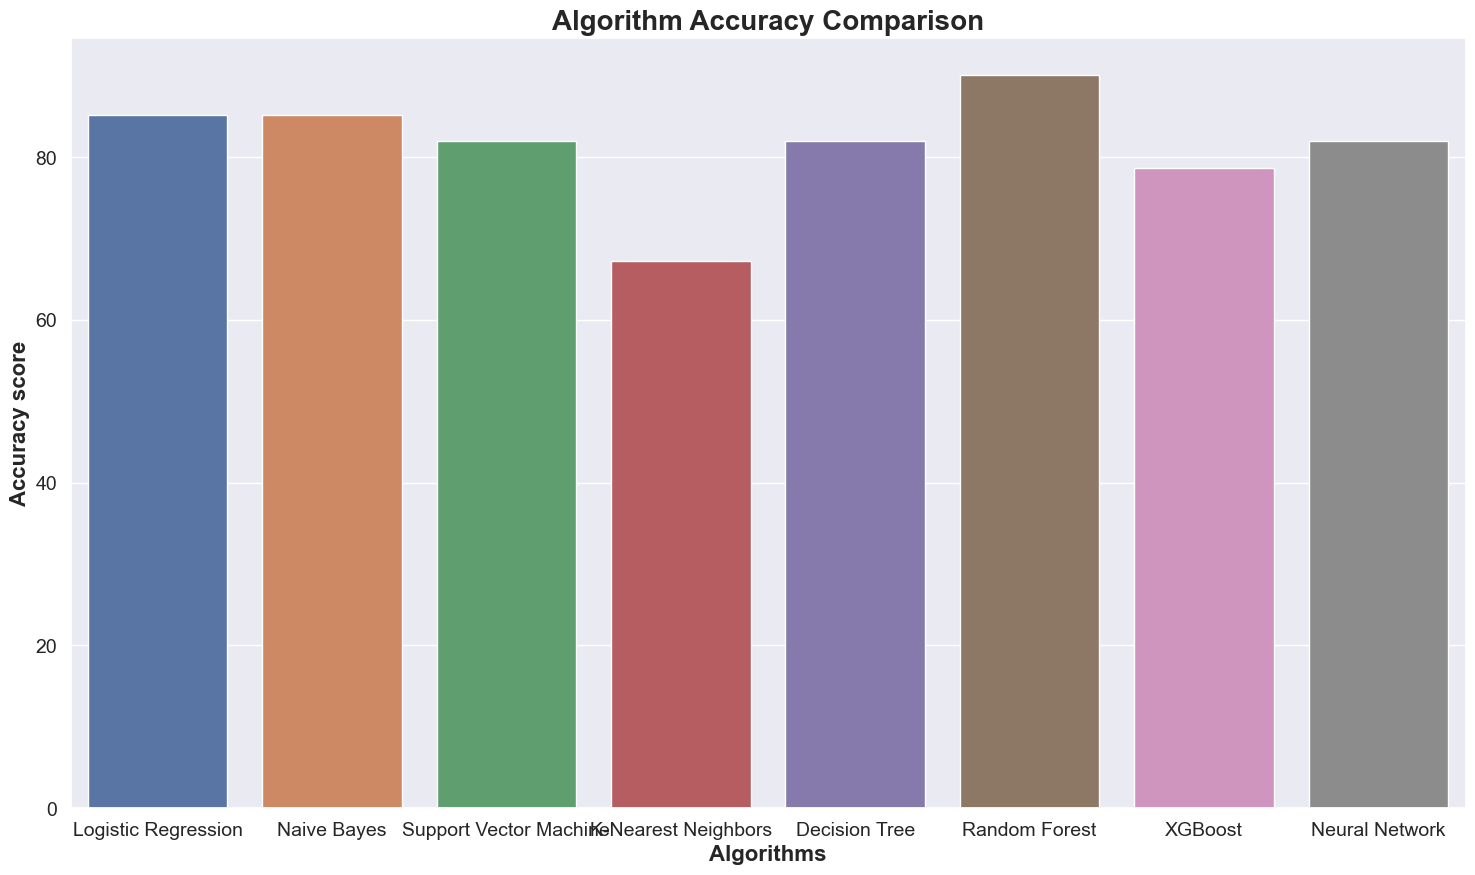

In [73]:
sns.set(rc={'figure.figsize':(18,10)})
plt.xlabel("Algorithms", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy score", fontsize=16, fontweight='bold')
plt.title("Algorithm Accuracy Comparison", fontsize=20, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


sns.barplot(x=algorithms, y=scores)

### there random forest has good result as compare to other algorithms <br> <br>

## Prediction on the basis of Random Forest

In [110]:
# Prompt user for input data
print("Please provide the following inputs:")

# Replace with appropriate input prompts for all features
age = int(input("Age: "))
sex = int(input("Sex (1=Male, 0=Female): "))
cp = int(input("Chest Pain Type (0-3): "))
trtbps = int(input("Resting Blood Pressure: "))
chol = int(input("Cholesterol Level: "))
fbs = int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): "))
restecg = int(input("Resting Electrocardiographic Results (0-2): "))
thalachh = int(input("Maximum Heart Rate Achieved: "))
exng = int(input("Exercise-Induced Angina (1=Yes, 0=No): "))
oldpeak = float(input("ST Depression Induced by Exercise: "))
slp = int(input("Slope of Peak Exercise ST Segment (0-2): "))
caa = int(input("Number of Major Vessels (0-3): "))
thall = int(input("Thalassemia (1=Normal, 2=Fixed Defect, 3=Reversible Defect): "))

# Create a feature vector
user_input = np.array([[age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall]])

# Define the feature names (must match the training dataset)
feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 
                 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

# Convert to DataFrame with feature names
user_input_df = pd.DataFrame(user_input, columns=feature_names)


# Predict using the trained model
prediction = rf.predict(user_input_df)

# Output the prediction
output_map = {0: "No Heart Disease", 1: "Heart Disease Detected"}
result = output_map[prediction[0]]

# Output the result with a recommendation or uplifting message
if prediction[0] == 1:
    print("\nPrediction: Heart Disease Detected.")
    print("Recommendation: Please consult a doctor immediately for proper care. 💙")
else:
    print("\nPrediction: No Heart Disease.")
    print("Message: 🎉 Great news! Your heart is healthy. Keep smiling and stay awesome! 😊")


Please provide the following inputs:
Age: 180
Sex (1=Male, 0=Female): 0
Chest Pain Type (0-3): 3
Resting Blood Pressure: 120
Cholesterol Level: 150
Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): 1
Resting Electrocardiographic Results (0-2): 1
Maximum Heart Rate Achieved: 72
Exercise-Induced Angina (1=Yes, 0=No): 1
ST Depression Induced by Exercise: 0.2
Slope of Peak Exercise ST Segment (0-2): 0
Number of Major Vessels (0-3): 0
Thalassemia (1=Normal, 2=Fixed Defect, 3=Reversible Defect): 3

Prediction: Heart Disease Detected.
Recommendation: Please consult a doctor immediately for proper care. 💙
